In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:
satisfaction_data = pd.read_csv('data/satisfaction-data-clean-updated.csv')

In [3]:
satisfaction_data_gender = satisfaction_data[satisfaction_data['GEO'] == 'Canada (excluding territories)']

In [4]:
satisfaction_data_gender = satisfaction_data_gender[satisfaction_data_gender['Gender'] != 'Total, all persons']

In [5]:
satisfaction_data_gender = satisfaction_data_gender.groupby(['Indicators', 'Gender']).agg({'VALUE':'mean'})

In [6]:
print(satisfaction_data_gender)

                                                  VALUE
Indicators                               Gender        
Life satisfaction rating between 0 and 5 Men     19.350
                                         Women   20.150
Life satisfaction rating of 6 or 7       Men     29.075
                                         Women   29.325
Life satisfaction rating of 8, 9 or 10   Men     51.600
                                         Women   50.500


In [7]:
satisfaction_data_prov = satisfaction_data[satisfaction_data['Gender'] == 'Total, all persons']

In [8]:
satisfaction_data_prov = satisfaction_data_prov[satisfaction_data_prov['GEO'] != 'Atlantic Region']

In [9]:
satisfaction_data_prov = satisfaction_data_prov[satisfaction_data_prov['GEO'] != 'Prairies Region']

In [10]:
satisfaction_data_prov = satisfaction_data_prov[satisfaction_data_prov['GEO'] != 'Canada (excluding territories)']

In [11]:
satisfaction_data_prov = satisfaction_data_prov.groupby(['Indicators', 'GEO']).agg({'VALUE':'mean'}).reset_index()

In [12]:
print(satisfaction_data_prov)

                                  Indicators                        GEO  \
0   Life satisfaction rating between 0 and 5                    Alberta   
1   Life satisfaction rating between 0 and 5           British Columbia   
2   Life satisfaction rating between 0 and 5                   Manitoba   
3   Life satisfaction rating between 0 and 5              New Brunswick   
4   Life satisfaction rating between 0 and 5  Newfoundland and Labrador   
5   Life satisfaction rating between 0 and 5                Nova Scotia   
6   Life satisfaction rating between 0 and 5                    Ontario   
7   Life satisfaction rating between 0 and 5       Prince Edward Island   
8   Life satisfaction rating between 0 and 5                     Quebec   
9   Life satisfaction rating between 0 and 5               Saskatchewan   
10        Life satisfaction rating of 6 or 7                    Alberta   
11        Life satisfaction rating of 6 or 7           British Columbia   
12        Life satisfacti

In [13]:
contingency_table = pd.pivot_table(satisfaction_data_prov, values=['VALUE'], index=['GEO'], columns=['Indicators'])

In [14]:
contingency_table

VALUE  \
Indicators                Life satisfaction rating between 0 and 5   
GEO                                                                  
Alberta                                                     20.650   
British Columbia                                            22.400   
Manitoba                                                    19.275   
New Brunswick                                               20.175   
Newfoundland and Labrador                                   15.950   
Nova Scotia                                                 21.300   
Ontario                                                     22.225   
Prince Edward Island                                        15.575   
Quebec                                                      13.800   
Saskatchewan                                                18.000   

                                                              \
Indicators                Life satisfaction rating of 6 or 7   
GEO                                                            
Alberta                                               29.900   
British Columbia                                      30.500   
Manitoba                                              27.525   
New Brunswick                                         25.625   
Newfoundland and Labrador                             26.650   
Nova Scotia                                           27.450   
Ontario                                               30.325   
Prince Edward Island                                  26.500   
Quebec                                                26.925   
Saskatchewan                                          30.100   

                                                                  
Indicators                Life satisfaction rating of 8, 9 or 10  
GEO                                                               
Alberta                                                   49.475  
British Columbia                                          47.050  
Manitoba                                                  53.200  
New Brunswick                                             54.200  
Newfoundland and Labrador                                 57.350  
Nova Scotia                                               51.275  
Ontario                                                   47.450  
Prince Edward Island                                      57.900  
Quebec                                                    59.275  
Saskatchewan                                              51.900

In [15]:
res = chi2_contingency(contingency_table)

In [16]:
print('pval:', res.pvalue, 'stat:', res.statistic, 'dof:', res.dof)

pval: 0.9703568979038235 stat: 8.49305059398375 dof: 18


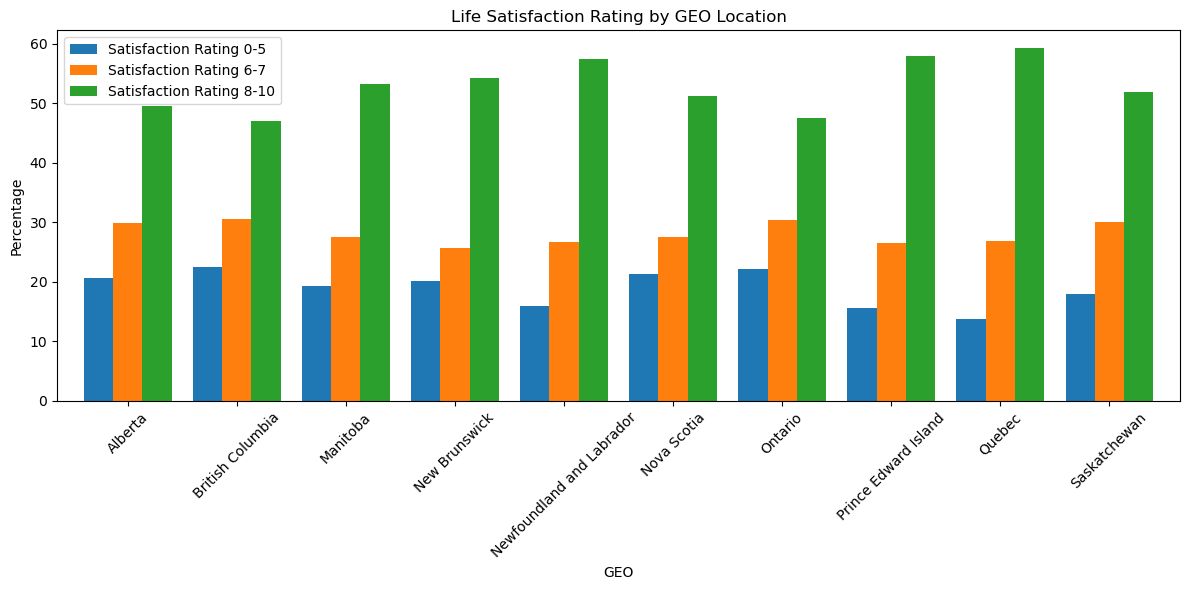

In [17]:
contingency_table.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Life Satisfaction Rating by GEO Location')
plt.xlabel('GEO')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(['Satisfaction Rating 0-5', 'Satisfaction Rating 6-7', 'Satisfaction Rating 8-10'])
plt.tight_layout()